In [131]:
from sympy import *

# 1

When the reference voltage of a 10-bit ADC is 5 V, the amplitude quantization level toggling the LSB is ?

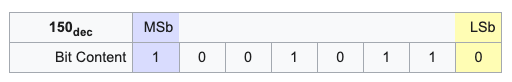

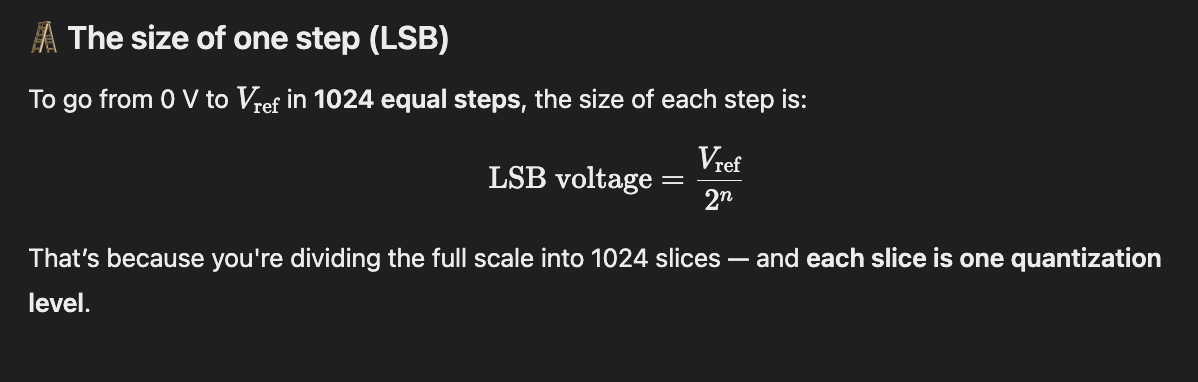

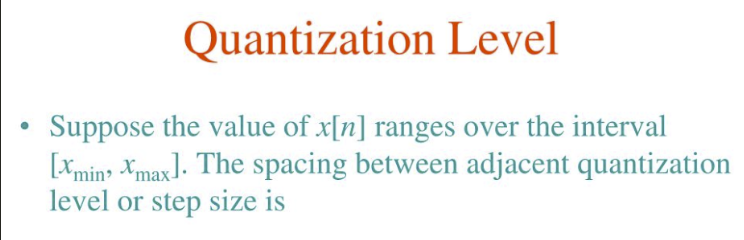

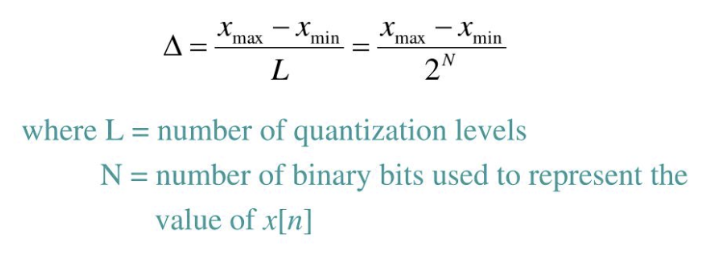

In [132]:
x_max = Vref = 5
x_min = 0
ADC_bits = 10 # 10-bit ADC

def bit(n):
    # returns the number of bits for an n-bit ADC
    return 2**n 

def Vstep(x_max, x_min, n):
    # returns the voltage step size for an n-bit ADC
    return (x_max - x_min) / bit(n)

quant_level = Vstep(x_max, x_min, ADC_bits)

bit(ADC_bits), quant_level * 10**3 # times 10^3 to get mV

(1024, 4.8828125)

# 2

In analogue to digital converters, an analogue signal is converted to a digital signal. Which statement about analogue to digital conversion is correct?

sampling occurs before quantization

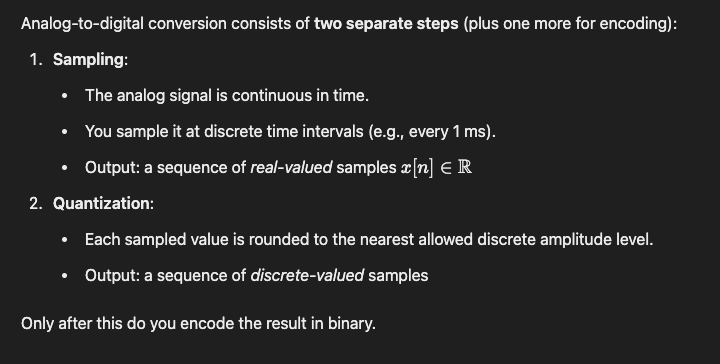

# 3

Et cosinus signal x(t) med signalfrekvensen 300 Hz samples med samplingsfrekvensen 1000 Hz. 

Herom gives en række sande eller falske udsagn. 

Vælg den svarmulighed, der er mest korrekt.

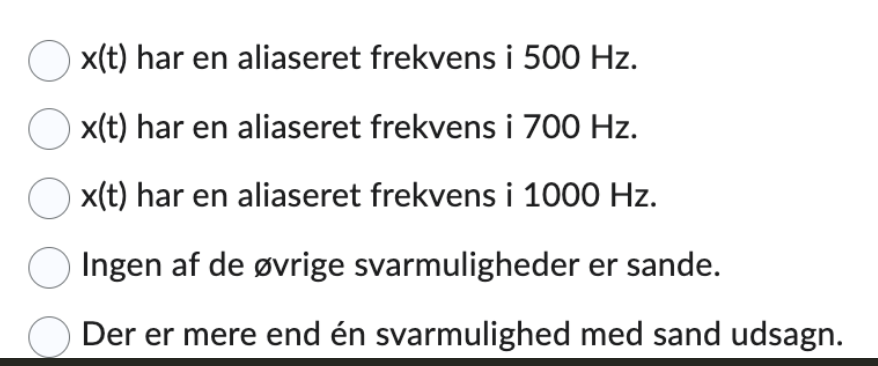

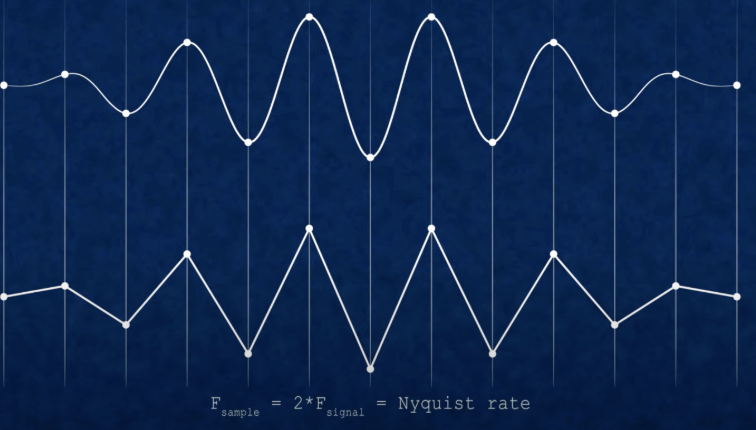

reducing the sample rate further than the nyquist rate results in aliasing ( not nough samples to capture a sufficient representation of the original )

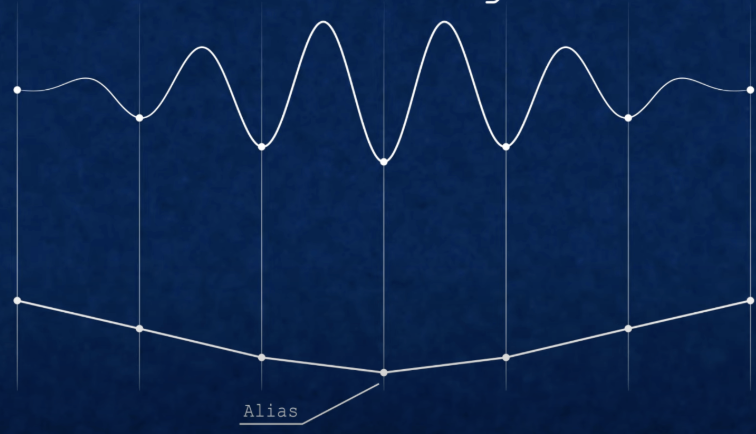

In [133]:
f = 300 # signal frequency
fs  = 1000 # 1/T ## sampling frequency
fh = fs / 2  # Nyquist frequency

def alias_frequency(f, fs):
    # Computes the aliased frequency of a signal frequency f (Hz) when sampled at fs (Hz).

    # Bring f into the range [0, fs]
    f_mod = f % fs  # modulo operator to get the remainder of f/fs

    # Mirror around Nyquist if necessary
    if f_mod > fs / 2:
        print("d")
        return abs(fs - f_mod)
    else:
        print(f"since {f_mod} < {fs/2}, no aliasing occurs")
        return f_mod

alias_frequency(f, fs)

since 300 < 500.0, no aliasing occurs


300

In [134]:
f = 300     # signal frequency (Hz)
fs = 1000   # sampling frequency (Hz)
fh = fs / 2 # Nyquist frequency

def alias_frequency(f, fs):
    """
    Returns the aliased frequency when a signal of frequency f (Hz) 
    is sampled at sampling frequency fs (Hz).
    """
    f_mod = f % fs  # Bring frequency into [0, fs)
    f_alias = abs(fs - f_mod)
    print(f"the signal frequency {f} has an aliased frequency in {f_alias}")
    print("\n")

    if f_mod > fs / 2:
        print(f"{f} Hz aliases to {f_alias} Hz after sampling at {fs} Hz.")
        return f_alias
    else:
        print(f"{f} Hz is below Nyquist ({fs/2} Hz), so no aliasing occurs.")
        return f_mod

# Run it
alias_frequency(f, fs)


the signal frequency 300 has an aliased frequency in 700


300 Hz is below Nyquist (500.0 Hz), so no aliasing occurs.


300

# 4

Et signal skal digitaliseres med en ADC der accepterer en input spænding i intervallet 0 til 5 V. 

Signalets uforstærkede spændingsinterval er fra -1 mV til +1 mV. 

Det digitaliserede signal skal kunne registrere en amplitudeændring på det uforstærkede signal på ned til 3 mikrovolt.

In [135]:
# Given signal parameters
vin_min = -1e-3         # -1 mV
vin_max = 1e-3          # +1 mV
v_adc_min = 0           # ADC input range min
v_adc_max = 5           # ADC input range max
v_resolution_target = 3e-6  # target resolution in volts (3 µV)

# ADC configuration to test
adc_bits = 10
gain = 2500
offset = 2.5

# adc_bits = 8 ## doesn't work
# gain = 2000
# offset = 1e-3

# adc_bits = 12 ## doesn't work
# gain = 3000
# offset = 5

# Amplified signal range
v_amp_min = vin_min * gain + offset
v_amp_max = vin_max * gain + offset

# Check if signal fits within ADC range
fits_adc_range = (v_amp_min >= v_adc_min) and (v_amp_max <= v_adc_max)

# ADC step size (resolution)
adc_levels = 2 ** adc_bits
adc_step_size = (v_adc_max - v_adc_min) / adc_levels  # in volts

# Minimum detectable voltage change at the input (back-calculated through gain)
detectable_input_change = adc_step_size / gain

# Result
print("Amplified signal range: [{:.2f} V, {:.2f} V]".format(v_amp_min, v_amp_max))
print("ADC step size: {:.3f} mV".format(adc_step_size * 1e3))
print("Minimum detectable input change: {:.2f} µV".format(detectable_input_change * 1e6))
print("Target resolution (input): {:.2f} µV".format(v_resolution_target * 1e6))
print("Fits ADC input range:", fits_adc_range)
print("Target resolution achieved:", detectable_input_change <= v_resolution_target)


Amplified signal range: [0.00 V, 5.00 V]
ADC step size: 4.883 mV
Minimum detectable input change: 1.95 µV
Target resolution (input): 3.00 µV
Fits ADC input range: True
Target resolution achieved: True


# 5

Et signal med information i frekvensintervallet 0 til 300 Hz ønskes samplet med en 10 bit ADC. 

Over 300 Hz falder signalets amplitude med 6 dB per oktav (1 oktav = fordobling af frekvens). 

Der benyttes et 2. ordens lavpas filter med en knækfrekvens i 300 Hz til at dæmpe frekvenser over 300 Hz. 

Hvad er den mindste samplingsfrekvens Fs, der kan benyttes, 

hvis signalets amplitude ved den halve samplingfrekvens ønsket dæmpet så meget at signalet ikke kan detekteres af ADCen.

In [136]:
f_signal_max = 300  # Max signal frequency in Hz
attenuation_per_octave = 6  # dB/octave
filter_order = 2  # Second-order low-pass filter

# The attenuation of a second-order filter is 12 dB per octave (6 dB/octave per order)
attenuation_per_octave_total = attenuation_per_octave * filter_order  # 12 dB/octave

# We want the alias frequency (Fs/2) to be attenuated enough so it's below ADC detectability
# Let us compute how many octaves above 300 Hz we need to go to achieve 60 dB attenuation
desired_attenuation = 60  # dB

# Octaves needed
octaves_needed = desired_attenuation / attenuation_per_octave_total

# Frequency corresponding to that many octaves above 300 Hz
f_alias = f_signal_max * (2 ** octaves_needed)

# Sampling frequency is twice the alias frequency
Fs = 2 * f_alias
Fs

19200.0

# 6

Databladet på en ADC fortæller at den effektive dynamic range på en ADC er 90 dB (afrundet), 

hvor den teoretiske dynamic range er 96 dB (afrundet). 

Hvor mange bits udnyttes og hvor mange bit udnyttes ikke (i afrundede tal).

In [137]:
# Theoretical dynamic range formula:
# Dynamic range (dB) = 6.02 * N + 1.76, where N is the number of bits

# Given:
DR_effective = 90  # dB
DR_theoretical = 96  # dB

# Solving for number of bits used effectively
N_used = Symbol('N', real=True)
eq = Eq(6.02 * N_used + 1.76, DR_effective)
N_used_solution = solve(eq, N_used)[0]

# Solving for number of bits theoretically available
N_total = Symbol('N', real=True)
eq2 = Eq(6.02 * N_total + 1.76, DR_theoretical)
N_total_solution = solve(eq2, N_total)[0]

# Bits not used = total bits - effective bits
bits_not_used = N_total_solution - N_used_solution

# Rounded values
N_used_rounded = round(N_used_solution)
bits_not_used_rounded = round(bits_not_used)

N_used_rounded, bits_not_used_rounded


(15, 1)

In [138]:
# unrounded values
N_used = N_used_solution
bits_not_used = bits_not_used

N_used, bits_not_used

(14.6578073089701, 0.996677740863788)

# 